# **Big Mart- Predictive Analysis**

**Problem Statement**

The Data Scientists at BigMart collected 2013 sales data for 1559 products across 10 stores in different cities. Certain attributes of each product and store have been defined. The aim is to find out the sales of each product at a particular store and build a predictive model. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Hypothesis Generation**

Following are some of the Hypotheses based on the problem statement:

1- Sales are higher during weekends.

2- Higher sales during morning and late evening.

3- Higher sales during end of the year.

4- Store size affects the sales.

5- Location of the store affects the sales.

6- Items with more shelf space sell more.




**Loading Packages & Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
sns.set
%matplotlib inline

In [3]:
train = pd.read_csv("/content/Train.csv")

In [4]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [5]:
train.shape

(8523, 12)

**Data Structure and Content**

In [7]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We have two types of data.

1) float64 which are numerical values.

2) object which can be theoritical or categorical columns.

**Exploratory Data Analysis**

In [11]:
# Checking for null values
train.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [12]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have 1463 missing values in Item_Wight and 2410 missing values in Outlet_Size.

In [13]:
numerical_columns = train.select_dtypes(exclude="object").columns.tolist()
print(numerical_columns)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [14]:
categorial_columns = train.select_dtypes(include="object").columns.tolist()
print(categorial_columns)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [15]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
duplicate=train.duplicated()
duplicate.sum()

0

No duplicates found in our dataset.

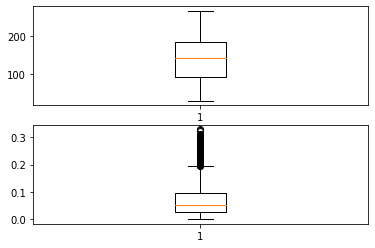

In [19]:
fig, ax = plt.subplots(2, 1)

ax[0].boxplot(train["Item_MRP"])
ax[1].boxplot(train["Item_Visibility"])

plt.show()

There are outliers in our data we can use mean to fill the missing values in Item_Weight column.

**Missing Value Treatment**

In [20]:
# Item_Weight is a continous attribute so we will replace the missing values with mean
train["Item_Weight"] = train["Item_Weight"].fillna(train["Item_Weight"].mean())
train["Item_Weight"].isnull().sum()

0

In [21]:
# Outlet_Size is a categorial attribute so replacing the null values with missing value
train["Outlet_Size"] = train["Outlet_Size"].fillna(str(train["Outlet_Size"].mode()))
train["Outlet_Size"].isnull().sum()

0

In [22]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Unvariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba42c5a790>]],
      dtype=object)

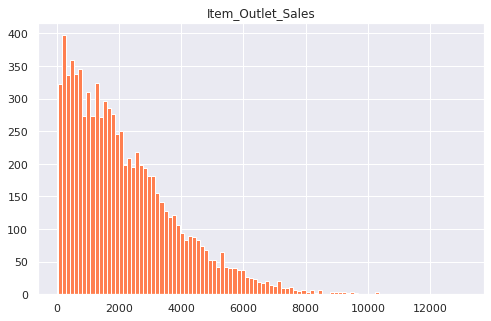

In [30]:
train.hist(column='Item_Outlet_Sales', bins=100, color='coral')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba42d97f10>]],
      dtype=object)

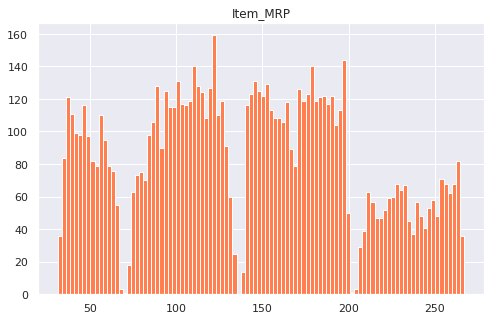

In [29]:
train.hist(column='Item_MRP', bins=100, color='coral')

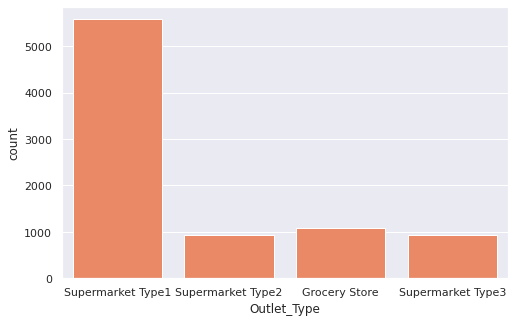

In [28]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='Outlet_Type', data=train, color='coral')

**Feature Engineering**

In [36]:
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [34]:
# LF is Low Fat and reg is Regular so I will replace LF with Low Fat, reg Regular, low fat with Low Fat
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

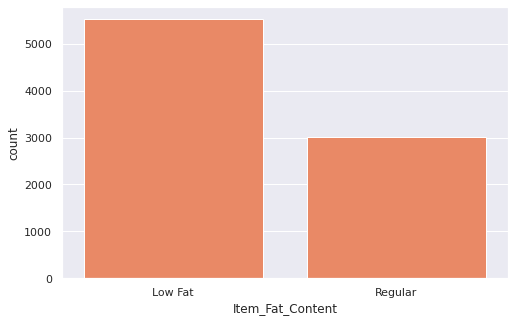

In [35]:
sns.countplot(x='Item_Fat_Content', data=train, color='Coral')

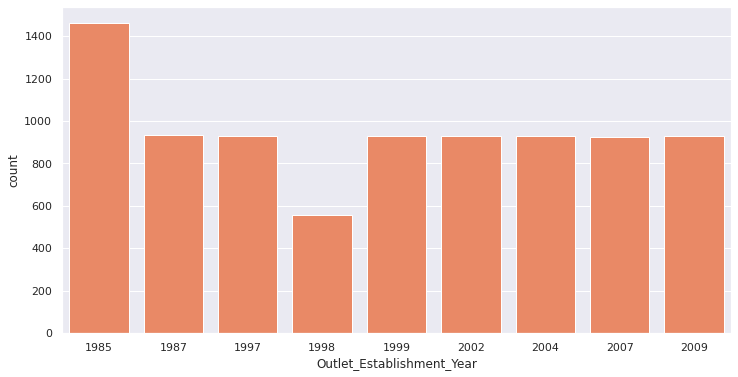

In [56]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Outlet_Establishment_Year', data=train, color='coral')

**Bivariate Analysis**

We find the dependent and independent variables in the dataset.

In [37]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


Text(0.5, 1.0, 'Relation b/w Item Weight & its Sales at Outlets')

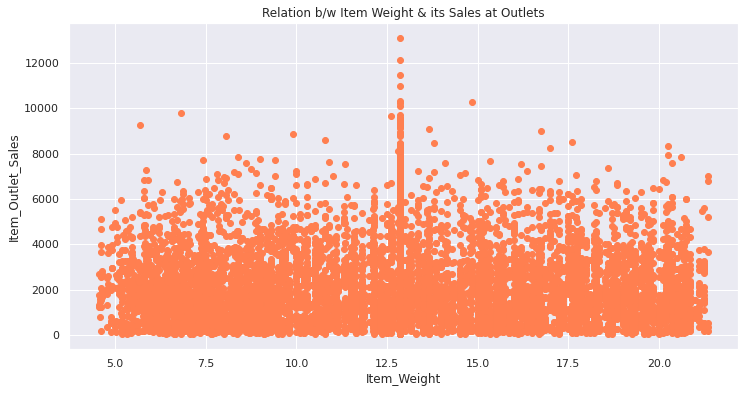

In [47]:
plt.figure(figsize=(12,6))
plt.scatter(train.Item_Weight,train.Item_Outlet_Sales, color='Coral')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relation b/w Item Weight & its Sales at Outlets')

There is strong relationship b/w these two columns

Text(0.5, 1.0, 'Relationship b/w Item Visibility & Sales at outlets')

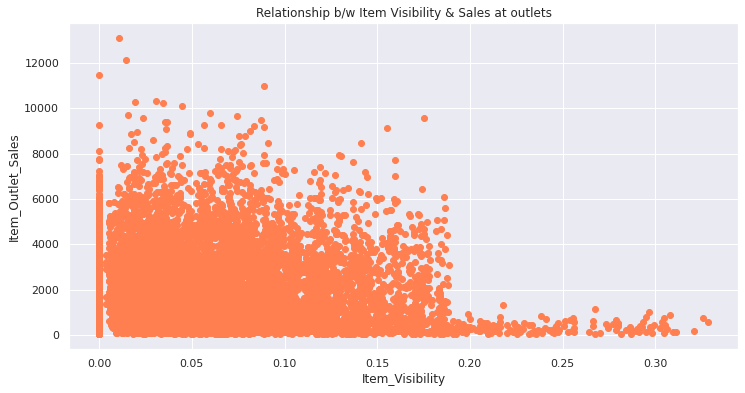

In [48]:
plt.figure(figsize=(12,6))
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales, color='Coral')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relationship b/w Item Visibility & Sales at outlets')

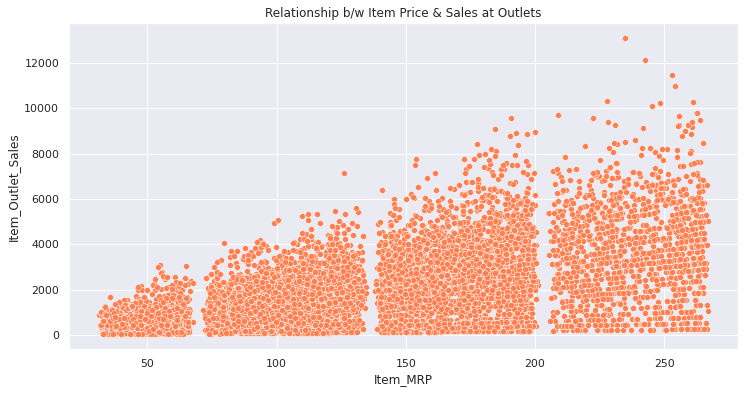

In [57]:
# Create the figure
sns.scatterplot(x=train["Item_MRP"], y=train["Item_Outlet_Sales"], color='coral')

# Add labels and title
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relationship b/w Item Price & Sales at Outlets')

# Show the plot
plt.show()

**Label Encoding (Categorial)**

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['Item_Identifier'] = encoder.fit_transform(train["Item_Identifier"])
train['Item_Fat_Content'] = encoder.fit_transform(train["Item_Fat_Content"])
train['Item_Type'] = encoder.fit_transform(train["Item_Type"])
train['Outlet_Identifier'] = encoder.fit_transform(train["Outlet_Identifier"])
train['Outlet_Size'] = encoder.fit_transform(train["Outlet_Size"])
train['Outlet_Location_Type'] = encoder.fit_transform(train["Outlet_Location_Type"])
train['Outlet_Type'] = encoder.fit_transform(train["Outlet_Type"])

train = train.apply(encoder.fit_transform)

In [59]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train[categorial_columns])
encoded_cols = list(encoder.get_feature_names(categorial_columns))
train[encoded_cols] = encoder.transform(train[categorial_columns])

In [61]:
train.isnull().sum().sum()

0

In [62]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,156,284,0,664,4,5592,9,4,2,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8,57,1,880,14,473,3,8,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,662,376,0,715,10,2901,9,4,2,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1121,393,1,0,6,4227,0,3,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1297,265,0,0,9,627,1,1,1,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**Preprocessing**

In [63]:
x=train
y=x.pop("Item_Outlet_Sales")

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40, random_state=1)

**Modeling**

**Linear regression**

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [77]:
reg.score(x_test,y_test)

-1.120295590283198e+16

**Regularized Linear Regression**

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = reg.predict(x_test)
print("Accuracy by mean squared error:",  mean_squared_error(y_test, predictions))

Accuracy by mean squared error: 9.595503990807607e+21


In [81]:
from sklearn.linear_model import Ridge
reg2 = Ridge(alpha=1.0)
reg2.fit(x_train, y_train)

predications = reg2.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 376961.5342415484


In [82]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

predications = lasso.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 360762.11805644695


In [83]:
from sklearn.linear_model import ElasticNet
reg_e = ElasticNet(alpha = 0.1, l1_ratio=0.5)
reg_e.fit(x_train, y_train)
predications = reg_e.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 325086.1968655127


In [85]:
# Lasso Regression
LS=Lasso(alpha=0.05)
LS.fit(x_train,y_train)

Lasso(alpha=0.05)

In [86]:
LS.score(x_test,y_test)

0.5422120904937897

In [87]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(n_estimators = 100)
grad.fit(x_train,y_train)


GradientBoostingRegressor()

In [88]:
grad.score(x_test, y_test)

0.6488507221770154

In [89]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators = 50)
ran.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [90]:
ran.score(x_test, y_test)

0.6087516168297953

**Summary**

Fruits and Vegetables is the most selling Item_Type

Low Fat is the Highest Itrm_Fat_Content

Supermarket Type 1 has the most sales

Strong R/s B/w Item_Weight and Item_Outlet_Sales
Linear Regression score : -1.12

Lasso Regression score : 0.54

GradientBoostingRegressor score : 0.65

The fourth model used is RandomForestRegressor accuracy : 0.60